<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laplace transform**

## *Definition*

The Laplace transform is 

---
$$
\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s 
$$




## Khan Academy:
[link text](https://pt.khanacademy.org/math/differential-equations/laplace-transform/laplace-transform-tutorial/v/laplace-transform-1?modal=1)

## $${Tabelas}$$

*Time functions*

In [ ]:
functions

 *Laplace transform - frequency domain*

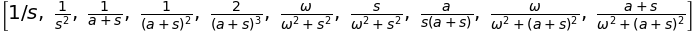

In [ ]:
Fs

### Biblioteca Transformada de Laplace

[link text](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)


In [ ]:
import numpy as np
import sympy
sympy.init_printing()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's define some symbols to work with. 

In [ ]:
t, s = sympy.symbols('t, s')
a,w    = sympy.symbols("a,w") 

We start with a simple function

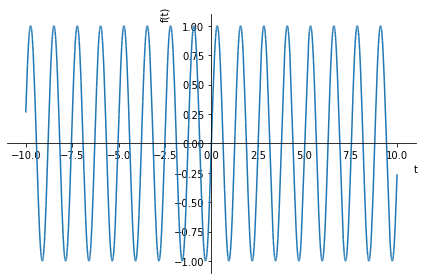

In [ ]:
w = 5
g = sympy.sin(w*t)
sympy.plot(g)

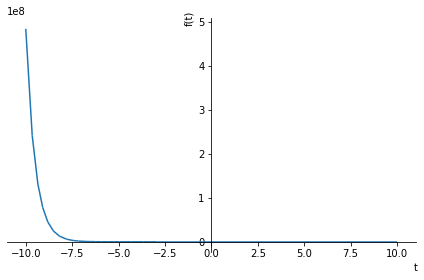

In [ ]:
f = sympy.exp(-2*t)
sympy.plot(f)
f

### Library function



Sympy provides a function called `laplace_transform` which does this more efficiently. By default it will return conditions of convergence as well (recall this is an improper integral, with an infinite bound, so it will not always converge).

In [ ]:
sympy.laplace_transform(f, t, s)


⎛  1           ⎞
⎜─────, 0, True⎟
⎝s + 2         ⎠

If we want just the function, we can specify `noconds=True`.

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

We will find it useful to define a quicker version of this:

In [ ]:
def L(f):
  return sympy.laplace_transform(f, t, s, noconds=True)

Exemplos

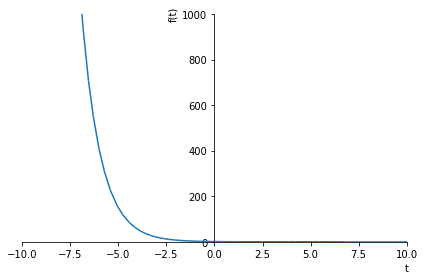

In [ ]:
## Exemplos

f = sympy.exp(-t)
sympy.plot(f, xlim=(-10, 10), ylim=(0, 1000))
f

In [ ]:
L(f)

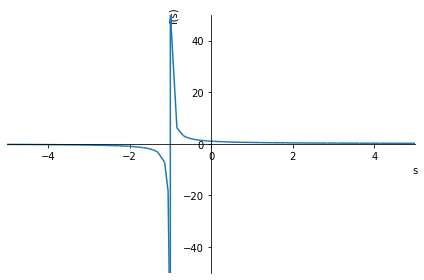

In [ ]:
sympy.plot(L(f), xlim=(-5, 5), ylim=(-50, 50))
L(f)

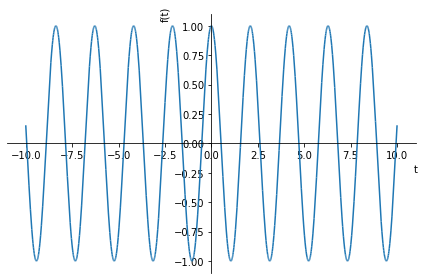

In [ ]:
g = sympy.cos(3*t)
sympy.plot(g)
g

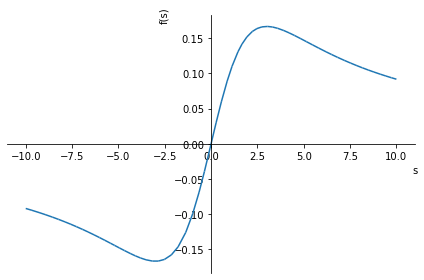

In [ ]:
G = L(g)
sympy.plot(G)
G

### Inverse Transform

In [ ]:
def invL(L):
    return sympy.inverse_laplace_transform(F, s, t)

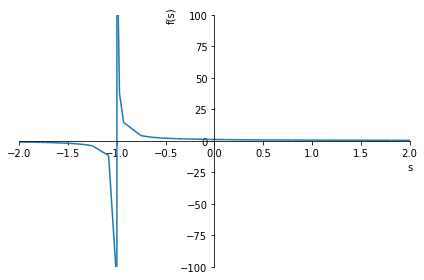

In [ ]:
F = 1/(1 + s)
sympy.plot(F,xlim=(-2, 2), ylim=(-100, 100))
F

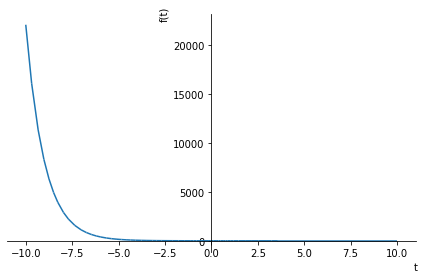

In [ ]:
invL(F)
sympy.plot(f)
invL(F)

In [ ]:
F

In [ ]:
!pip install control
import control

     |████████████████████████████████| 348kB 4.9MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=f02c120d8d39b9f293a85b458a7ab6d77a9df1c718f77b772f45bad881571604
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


## What is that θ?

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as $\theta(t)$ by sympy.

In [ ]:
sympy.Heaviside(t)

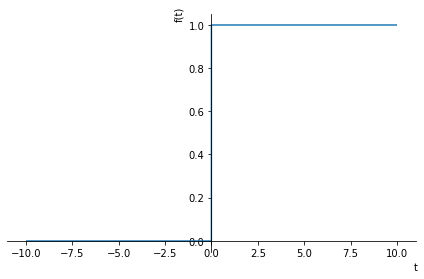

In [ ]:
sympy.plot(sympy.Heaviside(t));

Look at the difference between $f$ and the inverse laplace transform we obtained, which contains the unit step to force it to zero before $t=0$.

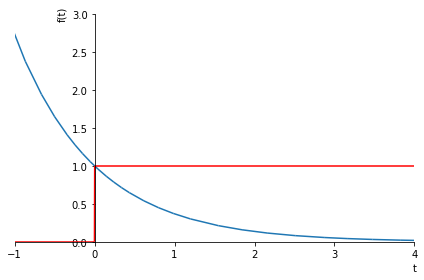

In [ ]:
f = sympy.exp(-t)
p = sympy.plot(f,sympy.Heaviside(t), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()
f*sympy.Heaviside(t)

### Reproducing standard transform table

Let's see if we can match the functions in the table

In [ ]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

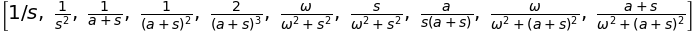

In [ ]:
Fs = [L(f) for f in functions]
Fs

### More complicated inverses

Why doesn't the table feature more complicated functions? Because higher-order rational functions can be written as sums of simpler ones through application of partial fractions expansion.

In [ ]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))

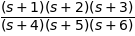

In [ ]:
F

In [ ]:
F.apart(s)

Even sympy can benefit from a little help sometimes. When we try to calculate the inverse of $F$ we get a bit of a nasty answer:

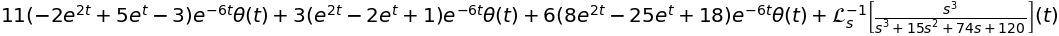

In [ ]:
invL(F)

Perhaps it looks better if we simplify?

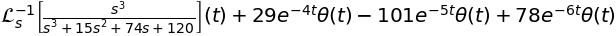

In [ ]:
invL(F).simplify()

No, it still features an "unknown" laplace transform. If we do the partial fractions expansion first, we get a clean answer:

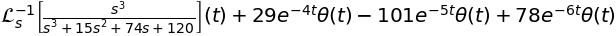

In [ ]:
invL(F.apart(s)).simplify()

## Atividade 1: 
Encontre as Transformadas de Laplace e mostre os graficos das funções
1.   $$f(t) = 5e^{-t}  $$
---
2.   $$f(t) = 2e^{-t/2}  $$
---
3.    $$f(t) = t^{2}  $$
---
4.   $$f(t) = e^{-t}\mathcal{cos} (3t) $$
---
5.   $$f(t) = \mathcal{cosh} (t) $$

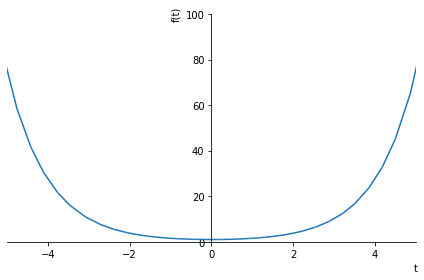

In [ ]:
# coloque aqui seu código
# dica
f = sympy.cosh(t)
sympy.plot(f,xlim=(-5, 5), ylim=(0, 100))
f

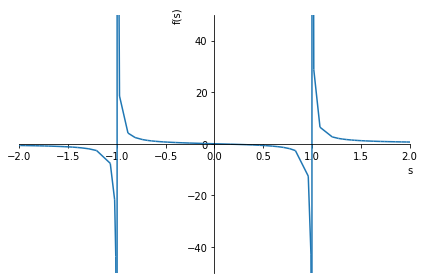

In [ ]:
F = L(f)
sympy.plot(F,xlim=(-2, 2), ylim=(-50, 50))
F

## Atividade 2:
Encontre as transformadas inversas das funções, e mostre o grafico


1.
$$
    \ F(s) = \frac{5}{1+s}
$$
2.
$$
    \ F(s) = \frac{1}{s^{2}+3s+2}
$$
3.
$$
    \ F(s) = \frac{5}{s+2} - \frac{2}{s+5}
$$
4.
$$
    \ F(s) = \frac{5}{ s^{2}+5^{2} }
$$
5.
$$
    \ F(s) = \frac{s}{ s^{2}+3^{2} }
$$


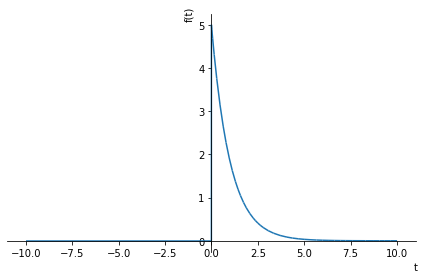

In [ ]:
## exemplo
F =  5/(s+ 1) 
sympy.plot(invL(F))
invL(F)

## Atividade 3:
Encontre as frações parciais das funções (quando possivel) e as transformadas inversas.


1.
$$
    \ F(s) = \frac{4(s+1)}{s^{2} + 10s +21}
$$
2.
$$
    \ F(s) = \frac{3(s+7)}{s^{2} + 7s +10}
$$
3.
$$
    \ F(s) = \frac{12}{s(s+3)(s+4)}
$$



In [ ]:
F = 12/(s*(s+3)*(s+4))
F.apart()


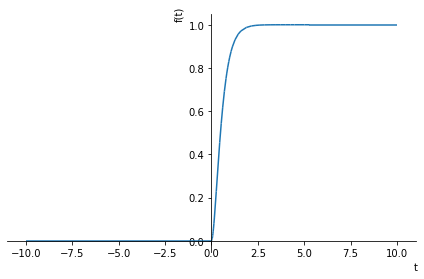

In [ ]:
sympy.plot(invL(F))
invL(F)